<a href="https://colab.research.google.com/github/PelletiBhargav/BVIP-DataScience/blob/main/Amazon_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.dates as dates
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [3]:
data=pd.read_csv('/content/sample_data/AMZNtrain.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


In [4]:
fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data['Date'],y=data['Open'].rolling(window=28).mean(),name="netflix"),secondary_y=False,)
fig.update_layout(autosize=False,width=700,height=500,title_text="AMAZON")
fig.update_xaxes(title_text="year")
fig.update_yaxes(title_text="prices",secondary_y=False)
fig.show()

In [5]:
t_data=pd.read_csv("/content/sample_data/AMZNtest (1).csv")
t_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,1465.199951,1553.359985,1460.930054,1539.130005,1539.130005,7983100
1,2019-01-03,1520.010010,1538.000000,1497.109985,1500.280029,1500.280029,6975600
2,2019-01-04,1530.000000,1594.000000,1518.310059,1575.390015,1575.390015,9182600
3,2019-01-07,1602.310059,1634.560059,1589.189941,1629.510010,1629.510010,7993200
4,2019-01-08,1664.689941,1676.609985,1616.609985,1656.579956,1656.579956,8881400


In [6]:
print(len(data))
print(len(t_data))

1258
21


In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Open'].values.reshape(-1,1))

In [8]:
prediction_days = 40

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x - prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [9]:
print(x_train.shape)
print(y_train.shape)

(1218, 40, 1)
(1218,)


In [11]:
def LSTM_model():

    model = Sequential()
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    return model
model = LSTM_model()
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 40, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 40, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 40, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [12]:
checkpointer = ModelCheckpoint(filepath = 'weights_best.hdf5', verbose = 1, save_best_only = True)
model.fit(x_train, y_train, epochs=20, batch_size=32,callbacks=[checkpointer])

Epoch 1/20
38/39 [============================>.] - ETA: 0s - loss: 0.0148

39/39 [==============================] - 10s 90ms/step - loss: 0.0148
Epoch 2/20
39/39 [==============================] - ETA: 0s - loss: 0.0036

39/39 [==============================] - 2s 61ms/step - loss: 0.0036
Epoch 3/20
38/39 [============================>.] - ETA: 0s - loss: 0.0026

39/39 [==============================] - 2s 63ms/step - loss: 0.0026
Epoch 4/20
38/39 [============================>.] - ETA: 0s - loss: 0.0032

39/39 [==============================] - 2s 61ms/step - loss: 0.0032
Epoch 5/20
38/39 [============================>.] - ETA: 0s - loss: 0.0024

39/39 [==============================] - 2s 60ms/step - loss: 0.0024
Epoch 6/20
38/39 [============================>.] - ETA: 0s - loss: 0.0027

39/39 [==============================] - 4s 91ms/step - loss: 0.0027
Epoch 7/20
39/39 [==============================] - ETA: 0s - loss: 0.0031

39/39 [==============================] - 3s 72ms/step - loss: 0.0031
Epoch 8/20
39/39 [==============================] - ETA: 0s - loss: 0.0025

39/39 [==============================] - 2s 63ms/step - loss: 0.0025
Epoch 9/20
39/39 [==============================] - ETA: 0s - loss: 0.0025

39/39 [==============================] - 2s 63ms/step - loss: 0.0025
Epoch 10/20
39/39 [==============================] - ETA: 0s - loss: 0.0026

39/39 [==============================] - 3s 80ms/step - loss: 0.0026
Epoch 11/20
38/39 [============================>.] - ETA: 0s - loss: 0.0021

39/39 [==============================] - 4s 101ms/step - loss: 0.0021
Epoch 12/20
39/39 [==============================] - ETA: 0s - loss: 0.0024

39/39 [==============================] - 6s 149ms/step - loss: 0.0024
Epoch 13/20
39/39 [==============================] - ETA: 0s - loss: 0.0019

39/39 [==============================] - 5s 133ms/step - loss: 0.0019
Epoch 14/20
39/39 [==============================] - ETA: 0s - loss: 0.0018

39/39 [==============================] - 2s 63ms/step - loss: 0.0018
Epoch 15/20
39/39 [==============================] - ETA: 0s - loss: 0.0018

39/39 [==============================] - 2s 63ms/step - loss: 0.0018
Epoch 16/20
38/39 [============================>.] - ETA: 0s - loss: 0.0021

39/39 [==============================] - 2s 61ms/step - loss: 0.0021
Epoch 17/20
39/39 [==============================] - ETA: 0s - loss: 0.0017

39/39 [==============================] - 3s 66ms/step - loss: 0.0017
Epoch 18/20
38/39 [============================>.] - ETA: 0s - loss: 0.0019

39/39 [==============================] - 3s 86ms/step - loss: 0.0019
Epoch 19/20
39/39 [==============================] - ETA: 0s - loss: 0.0017

39/39 [==============================] - 2s 64ms/step - loss: 0.0017
Epoch 20/20
39/39 [==============================] - ETA: 0s - loss: 0.0017

39/39 [==============================] - 2s 63ms/step - loss: 0.0017


In [16]:
actual_prices = t_data['Open'].values
total_dataset = pd.concat((data['Open'], t_data['Open']), axis=0)

model_inputs = total_dataset[len(total_dataset)-len(t_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)
x_test = []
for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
x=[]
values=[]
for i in range(5):
    x+=[i*5]
    values+=[t_data['Date'].values[i*5]]
print(x)
print(values)

1/1 [==============================] - 0s 37ms/step
[0, 5, 10, 15, 20]
['2019-01-02', '2019-01-09', '2019-01-16', '2019-01-24', '2019-01-31']


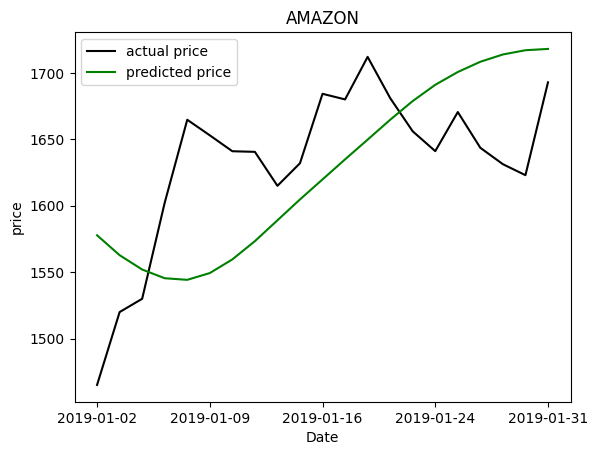

In [17]:
plt.xticks(x,values)
plt.plot(actual_prices, color='black', label=f"actual price")
plt.plot(predicted_prices, color='green', label=f"predicted price")
plt.title(f"AMAZON")
plt.xlabel("Date")
plt.ylabel(f"price")
plt.legend()
plt.show()

In [19]:
real_data = [model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))
print(real_data.shape)
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"prediction: {int(prediction[0][0])}")

(1, 39, 1)
1/1 [==============================] - 3s 3s/step
prediction: 1718
